## Spectral Clustering visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from clustertools.load_data import load_pathbased_data,load_fuzzy_data

from clustertools.models.similarity import SpectralClustering

%matplotlib inline

#we use networkx for graph plotting
import networkx as nx

#some methods in pyplot called from networkx are deprecated - suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#set font sizes for matplotlib plots and seaborn plots
fontsizeset = 20
rc={'axes.labelsize': fontsizeset, 'font.size': fontsizeset, 'legend.fontsize': fontsizeset, 'axes.titlesize': fontsizeset,'xtick.labelsize': fontsizeset, 'ytick.labelsize': fontsizeset}
sns.mpl.rcParams.update(rc)

In [3]:
def plot_spectral(data,spc, save=None, name='images/spectral_graph.pdf',text=None,fontsize=30):
    '''
    plots spectral clustering  subfigures including
    graph visualized with adjacency matrix generated from models.SpectralClustering
    
    data: dataset
    spc: SpectralClustering instance fitted on data
    '''
    f, axarr = plt.subplots(1,3, figsize=(30,10))
    axarr[0].scatter(data[:,0],data[:,1],alpha=.8)
    
    m,dim = spc_dat.shape
    graph = nx.from_numpy_matrix(spc._adjacency)
    
    pos = {key:value for (key,value) in enumerate(spc_dat[:,:2])}
    nx.draw(graph,node_size=30,pos=pos,ax=axarr[1])
    
    axarr[2].scatter(data[:,0],data[:,1],alpha=.9,c=spc.cluster_labels,cmap='brg')
    
    axarr[0].axis('off')
    axarr[1].axis('off')
    axarr[2].axis('off')
    axarr[0].set_title('Data points', fontsize=fontsize)
    axarr[1].set_title(text, fontsize=fontsize)
    axarr[2].set_title('Spectral Clustering', fontsize=fontsize)
    
    plt.tight_layout()
    if save == None:
        plt.show()
    else: 
        plt.savefig(name)
        
    return f

Constructing kNN adjacency matrix
Computing generalized Laplacian eigenproblem


KMeans initialization on eigenvectors...
terminated by break condition
4 iterations until termination.
Finished after 0:00:00.002018
max within-cluster distance to center: 0.219754
mean within-cluster distance to center: 0.084211
sum of within cluster squared errors: 3.247282
KMeans terminated. 

Finished after 0:00:00.259383


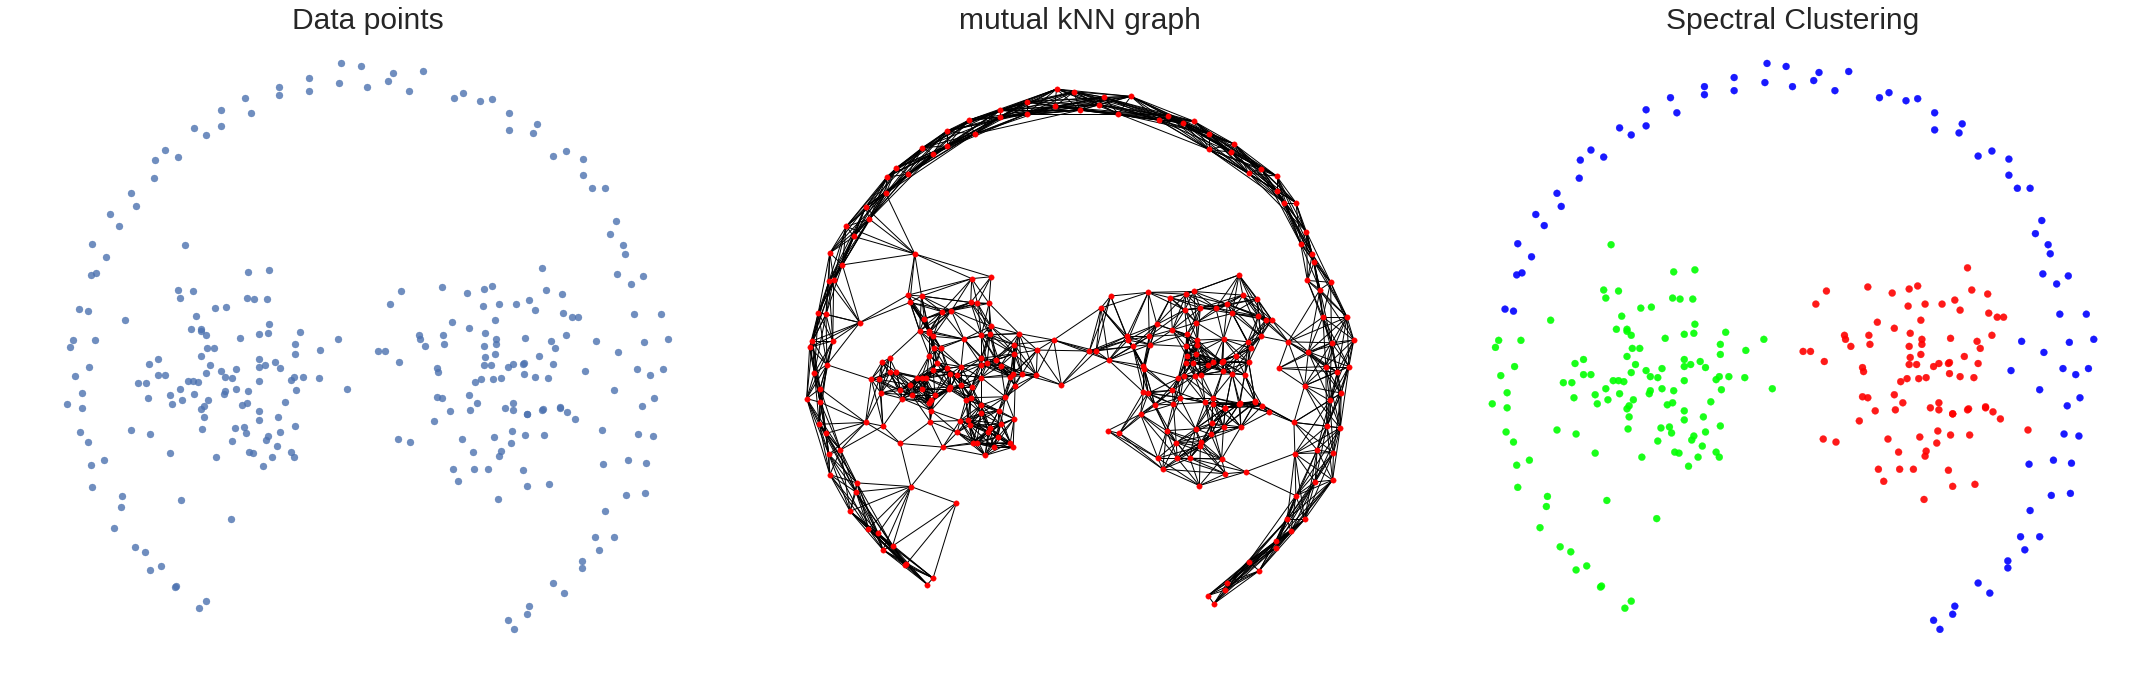

In [4]:
spc_dat = load_pathbased_data()
spc = SpectralClustering(spc_dat,similarity_measure='kNN',kNN_mode='mutual',k=3,k_neighbor=16,
                        kmeans_params = {'rtol':1e-8,'atol':10e-8})
spc.fit()
f1=plot_spectral(spc_dat,spc,text='mutual kNN graph')

Constructing discrete similarity matrix
Computing generalized Laplacian eigenproblem


KMeans initialization on eigenvectors...
terminated by break condition
3 iterations until termination.
Finished after 0:00:00.004905
max within-cluster distance to center: 0.244799
mean within-cluster distance to center: 0.051074
sum of within cluster squared errors: 1.413978
KMeans terminated. 

Finished after 0:00:00.251755


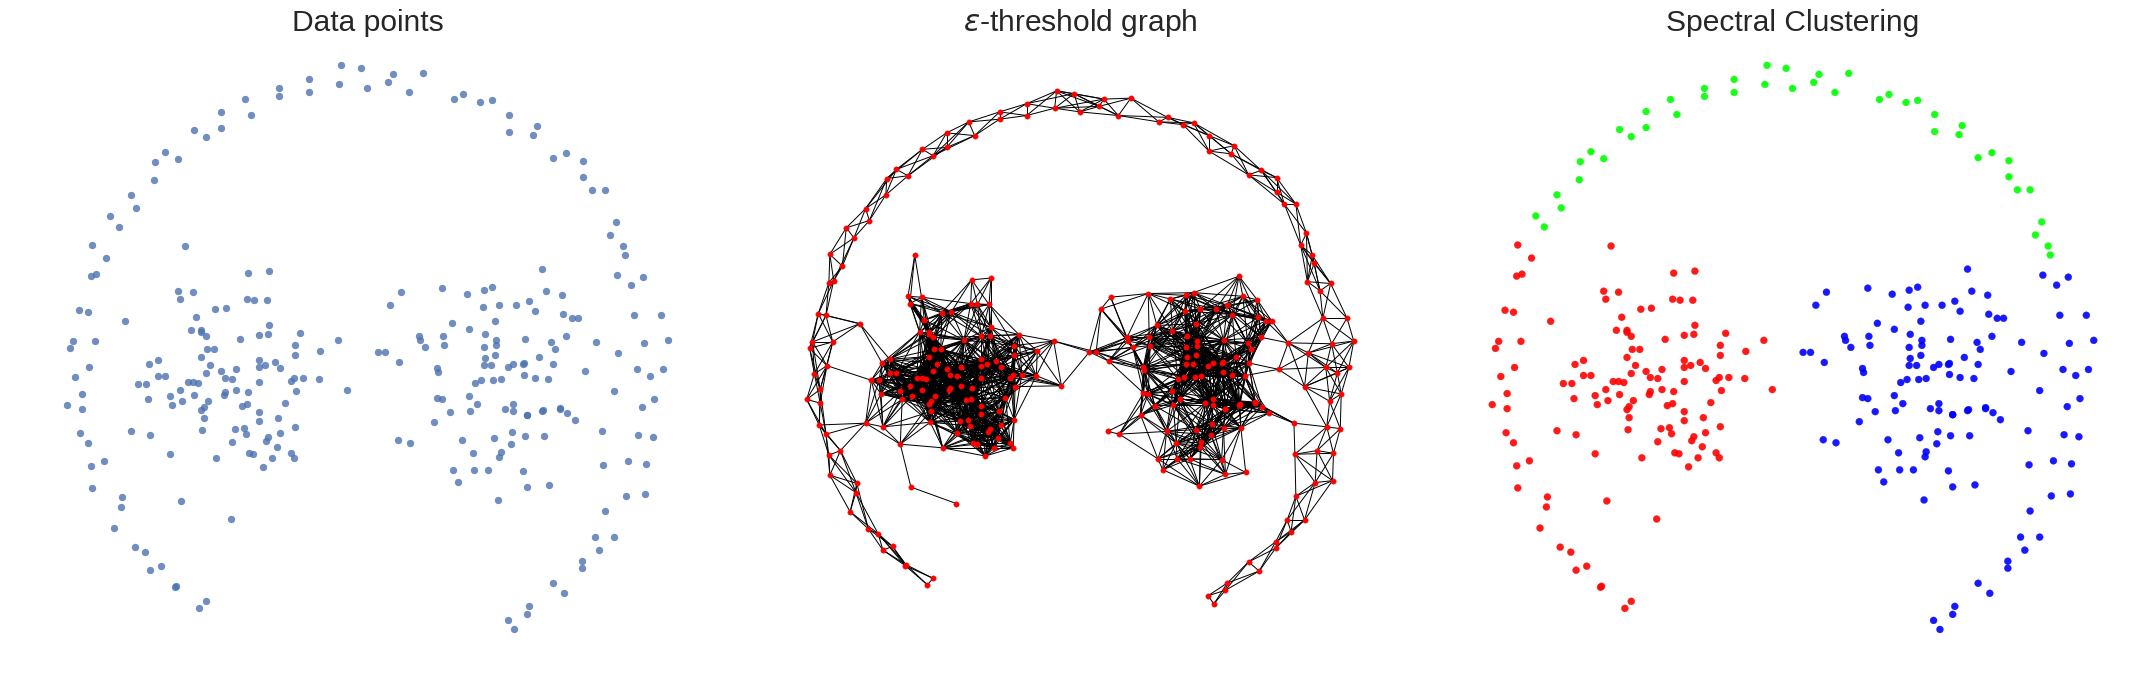

In [6]:
#spc_dat = load_pathbased_data()
spc = SpectralClustering(spc_dat,k=3,similarity_measure='eps_dist',eps=2.7)
spc.fit()
f2=plot_spectral(spc_dat,spc,text=u'$\epsilon$-threshold graph')

Constructing kNN adjacency matrix
Computing generalized Laplacian eigenproblem


KMeans initialization on eigenvectors...
terminated by break condition
6 iterations until termination.
Finished after 0:00:00.004361
max within-cluster distance to center: 0.099003
mean within-cluster distance to center: 0.046513
sum of within cluster squared errors: 3.035993
KMeans terminated. 

Finished after 0:00:23.135974


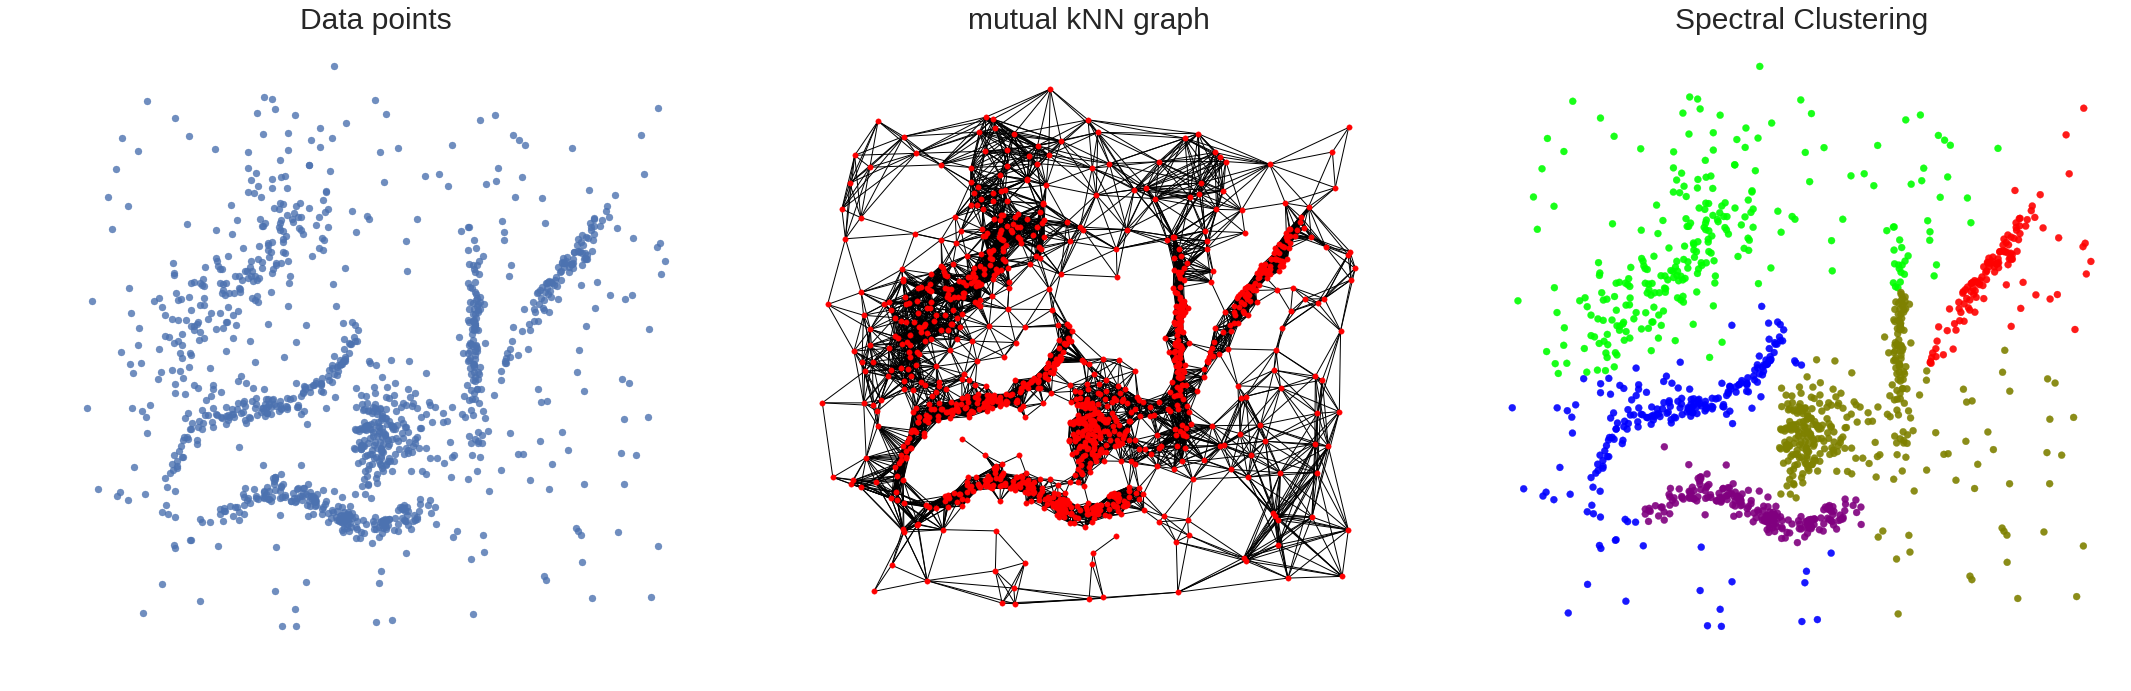

In [8]:
spc_dat = load_fuzzy_data(scale=True)
spc_dat = spc_dat[::2,:]
spc = SpectralClustering(spc_dat,similarity_measure='kNN',
                         kNN_mode='mutual',eps=.3,k=5,laplacian='normalized',k_neighbor=30,
                         kmeans_params = {'rtol':1e-8,'atol':10e-8})
spc.fit()
f3=plot_spectral(spc_dat,spc,text='mutual kNN graph')

Constructing gaussian similarity matrix
Computing generalized Laplacian eigenproblem


KMeans initialization on eigenvectors...
terminated by break condition
14 iterations until termination.
Finished after 0:00:00.007181
max within-cluster distance to center: 0.283039
mean within-cluster distance to center: 0.065565
sum of within cluster squared errors: 4.411289
KMeans terminated. 

Finished after 0:00:02.515023


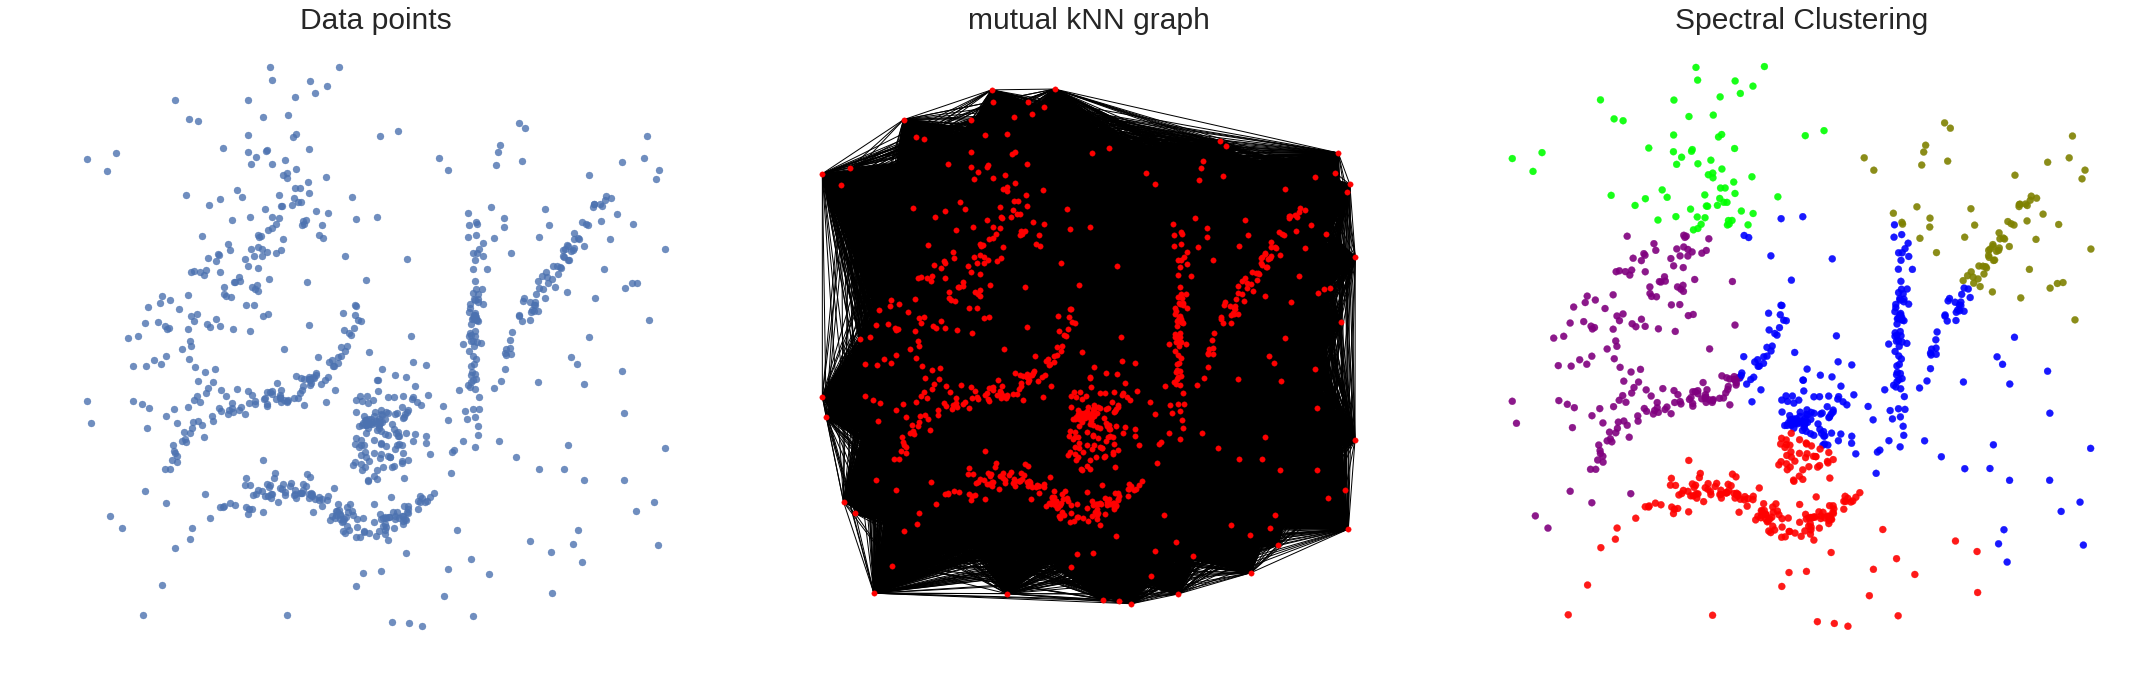

In [10]:
#weighted complete graph -> rendering takes some time ;)
spc_dat = load_fuzzy_data(scale=True)
spc_dat = spc_dat[::3,:]
spc = SpectralClustering(spc_dat,similarity_measure='gaussian',k=5,
                         laplacian='normalized', bandwidth=.2,
                         kmeans_params = {'rtol':1e-8,'atol':10e-8})
spc.fit()
f4=plot_spectral(spc_dat,spc,text='mutual kNN graph')